In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns
import plotly.express  as px
%matplotlib inline

In [6]:
loan_train=pd.read_csv('df1_loan.csv')
loan_test =pd.read_excel('loan_test.Xlsx')

In [7]:
loan_train.shape

(500, 15)

<AxesSubplot:>

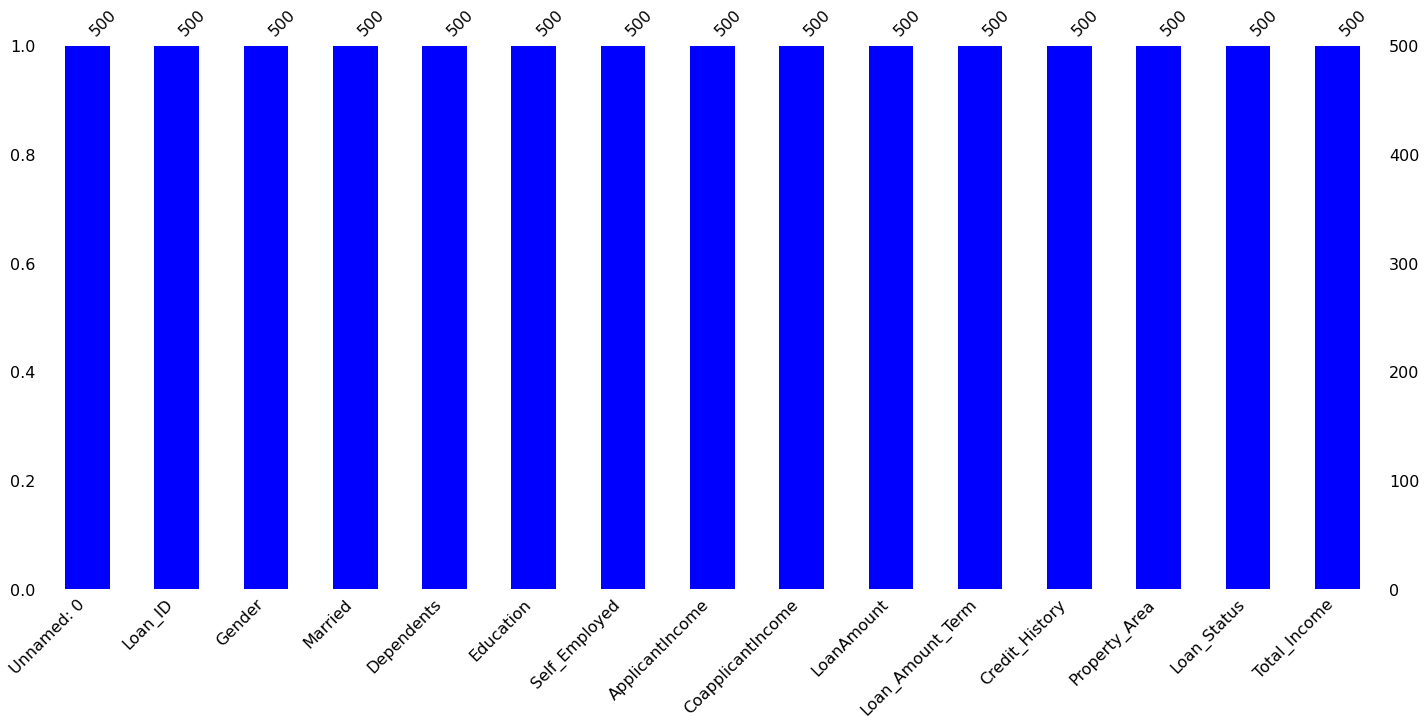

In [19]:
mns.bar(loan_train, color='blue')

In [9]:
#fill missing numbers

In [10]:
loan_train.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,"$5,849.00"
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,"$6,091.00"
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,"$3,000.00"
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,"$4,941.00"
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,"$6,000.00"


In [11]:
loan_train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [13]:
#fill the missing numbers

In [17]:
loan_train['Gender']  = loan_train['Gender'].fillna(loan_train['Gender'].dropna().mode().values[0])           
loan_train['Married']  = loan_train['Married'].fillna(loan_train['Married'].dropna().mode().values[0])      
loan_train['Dependents'] =loan_train['Dependents'].fillna(loan_train['Dependents'].dropna().mode().values[0])         
loan_train['Self_Employed'] =loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].dropna().mode().values[0])    
loan_train['Self_Employed']  = loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].dropna().mode().values[0])  
loan_train['LoanAmount']  = loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].dropna().median())       
loan_train['Loan_Amount_Term']= loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].dropna().mode().values[0])    
loan_train['Credit_History']= loan_train['Credit_History'].fillna(loan_train['Credit_History'].dropna().mode().values[0])  

In [20]:
loan_train.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.5,360.0,1.0,Urban,Y,"$5,849.00"
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,"$6,091.00"
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,"$3,000.00"
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,"$4,941.00"
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,"$6,000.00"


<AxesSubplot:>

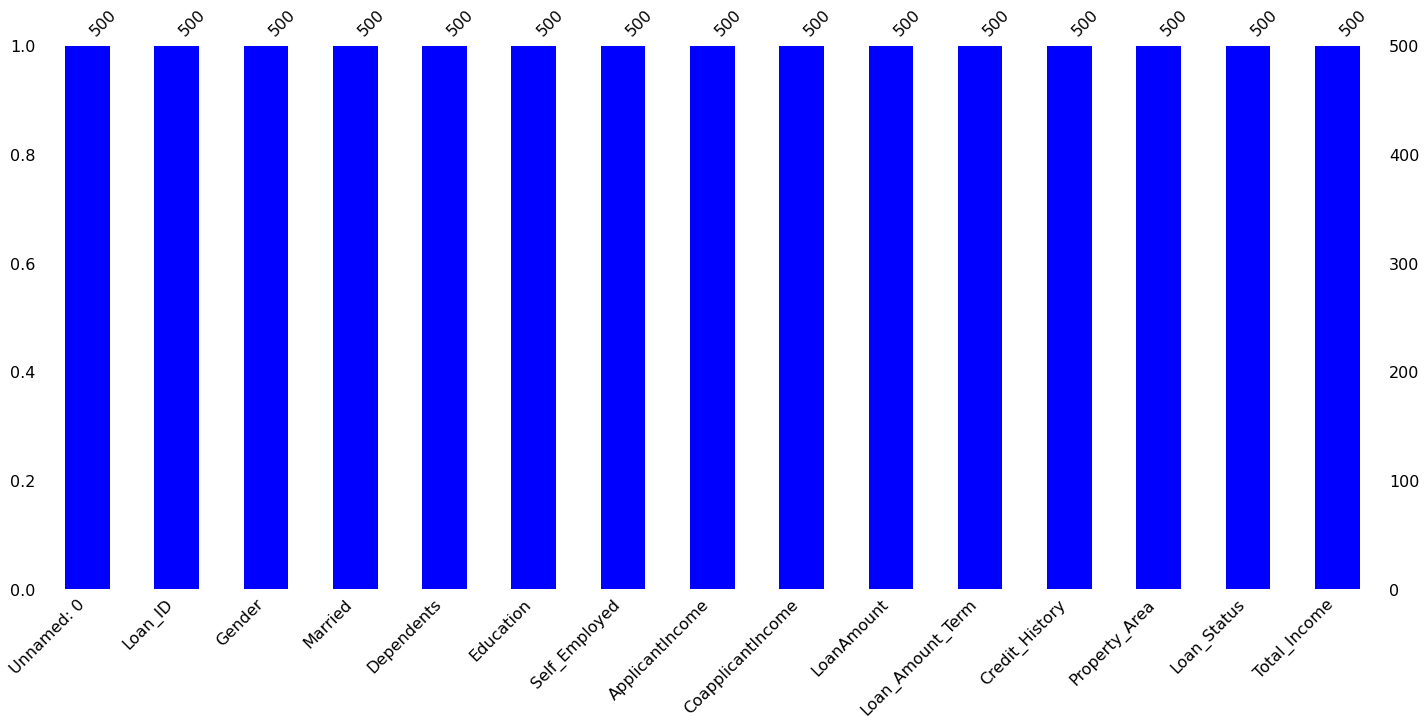

In [21]:
mns.bar(loan_train, color='blue')

In [22]:
loan_train['Credit_History']=loan_train['Credit_History'].astype(int)

In [23]:
loan_train.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.5,360.0,1,Urban,Y,"$5,849.00"
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N,"$6,091.00"
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y,"$3,000.00"
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y,"$4,941.00"
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y,"$6,000.00"


In [24]:
# to remove the dollar sign at the front of total income

In [26]:
loan_train['Total_Income']=loan_train['Total_Income'].str.replace('$','')

In [27]:
loan_train['Total_Income']=loan_train['Total_Income'].str.replace(',','')

In [29]:
loan_train.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.5,360.0,1,Urban,Y,5849.00
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N,6091.00
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y,3000.00
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y,4941.00
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y,6000.00


In [34]:
loan_train['Total_income']=loan_train['Total_income'].astype(float)

KeyError: 'Total_income'

In [35]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             500 non-null    object 
 3   Married            500 non-null    object 
 4   Dependents         500 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      500 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         500 non-null    float64
 10  Loan_Amount_Term   500 non-null    float64
 11  Credit_History     500 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [36]:
loan_train.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,126.5,360.0,1.0,Urban,Y,5849.00
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.00
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.00
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.00
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.00


In [37]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             500 non-null    object 
 3   Married            500 non-null    object 
 4   Dependents         500 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      500 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         500 non-null    float64
 10  Loan_Amount_Term   500 non-null    float64
 11  Credit_History     500 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [39]:
loan_train['Total_Income']=loan_train['Total_Income'].astype(float)

In [40]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             500 non-null    object 
 3   Married            500 non-null    object 
 4   Dependents         500 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      500 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         500 non-null    float64
 10  Loan_Amount_Term   500 non-null    float64
 11  Credit_History     500 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    float64
dtypes: float64(5), int64(2), object(8)
memory usage: 58.7+ KB


In [41]:
loan_train.drop(['Unnamed: 0','Loan_ID'],axis=1,inplace=True)

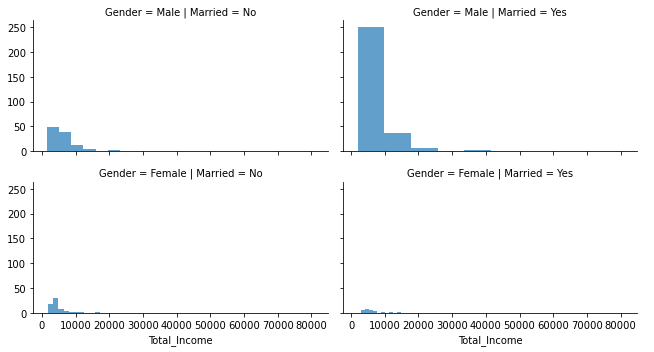

In [44]:
grid=sns.FacetGrid(loan_train,row='Gender', col='Married', height=2.5,aspect=1.8)
grid.map(plt.hist,'Total_Income',alpha=0.7, bins=10)
grid.add_legend()

<AxesSubplot:xlabel='Gender', ylabel='Total_Income'>

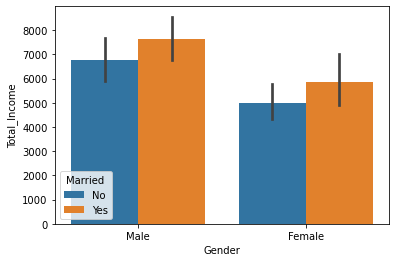

In [46]:
sns.barplot(x=loan_train['Gender'],y=loan_train['Total_Income'], hue =loan_train['Married'])

In [47]:
loan_train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [49]:
cat={'Yes':1,'No': 0,'Urban':1,'Semiurban':2,'Rural':3,'Graduate':1,'Not Graduate':0,'3+':3,'Male':1,'Female':0}
loan_train=loan_train.applymap(lambda s: cat.get(s) if s in cat else s)

In [50]:
loan_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,1,0,5849,0.0,126.5,360.0,1.0,1,Y,5849.0
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,N,6091.0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y,3000.0
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y,4941.0
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y,6000.0
